<a href="https://colab.research.google.com/github/hariharan-075/ML/blob/main/WEEK4_2420080075.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

# Use only one feature for visualization
X_feature = X[:, 0].reshape(-1, 1)

MSE: 0.7091157771765549
MAE: 0.629908653009376
R2 Score: 0.45885918903846656
Coefficient: 0.4193384939381271
Intercept: 0.4445972916907879


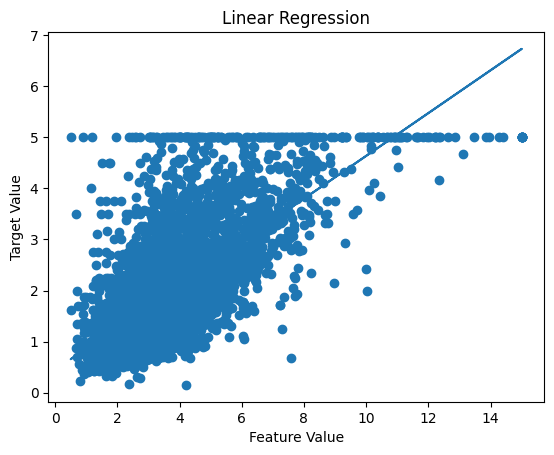

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_feature, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

# Model coefficients
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("Linear Regression")
plt.show()

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1-score: 0.9655172413793104
Confusion Matrix:
 [[39  4]
 [ 1 70]]


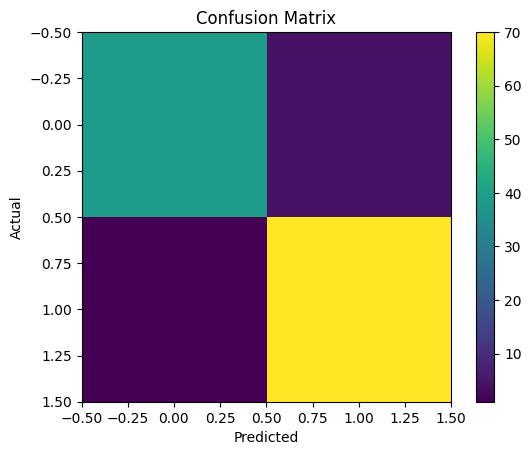

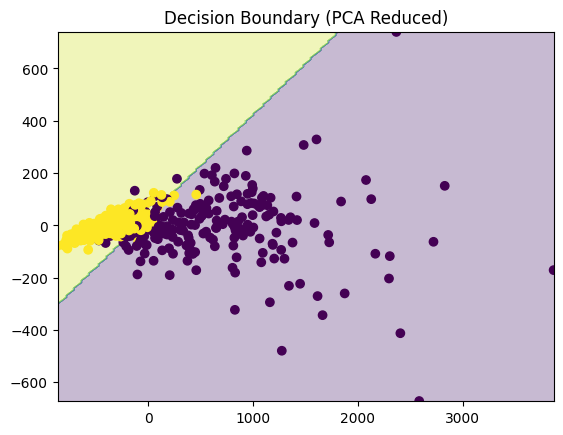

Logistic Regression Coefficients:
[[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.decomposition import PCA

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred)) mmmmmm
print("F1-score:", f1_score(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Decision Boundary Visualization (using PCA for 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model_pca = LogisticRegression()
model_pca.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Decision Boundary (PCA Reduced)")
plt.show()

# 8. Model coefficients
print("Logistic Regression Coefficients:")
print(model.coef_)

RIDGE & LASSO REGRESSION RESULTS

Alpha = 0.1
Ridge R2: 0.5757944553633947
Lasso R2: 0.5318167610318159

Alpha = 1
Ridge R2: 0.5758549611440138
Lasso R2: 0.2841671821008396

Alpha = 10
Ridge R2: 0.5764371559180028
Lasso R2: 0.00013905385370127643

Polynomial Regression R2: 0.6456819711504156

LOGISTIC REGRESSION WITH REGULARIZATION
C=0.01, Accuracy=0.9649122807017544
C=0.1, Accuracy=0.9824561403508771
C=1, Accuracy=0.9736842105263158
C=10, Accuracy=0.9736842105263158


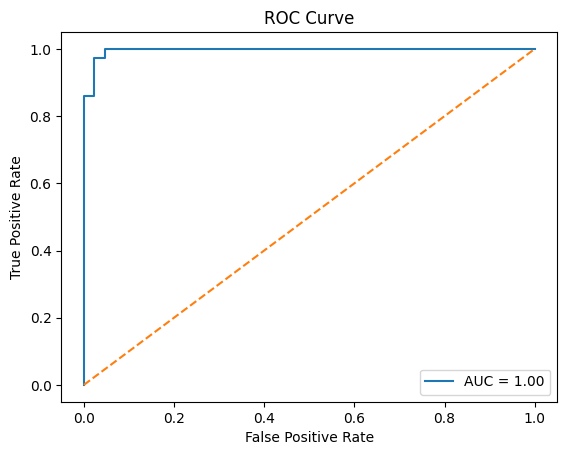


Cross Validation Scores
Linear Regression CV Mean: 0.7046861734644289
Logistic Regression CV Mean: 0.9806862288464524


In [ ]:
# POST-LAB
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc

# -------------------------------
# PART 1: Ridge & Lasso Regression
# -------------------------------
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.1, 1, 10]

print("RIDGE & LASSO REGRESSION RESULTS")
for a in alphas:
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    print(f"\nAlpha = {a}")
    print("Ridge R2:", r2_score(y_test, ridge.predict(X_test)))
    print("Lasso R2:", r2_score(y_test, lasso.predict(X_test)))

# -------------------------------
# PART 2: Polynomial Regression
# -------------------------------
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

print("\nPolynomial Regression R2:", r2_score(y_test, y_poly_pred))

# -------------------------------
# PART 3: Logistic Regression with Regularization
# -------------------------------
data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [0.01, 0.1, 1, 10]

print("\nLOGISTIC REGRESSION WITH REGULARIZATION")
for c in C_values:
    log_reg = LogisticRegression(C=c, max_iter=500)
    log_reg.fit(X_train, y_train)
    print(f"C={c}, Accuracy={log_reg.score(X_test, y_test)}")

# -------------------------------
# PART 4: ROC Curve & AUC
# -------------------------------
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# -------------------------------
# PART 5: Cross Validation
# -------------------------------
cv_scores_lr = cross_val_score(LinearRegression(), X, y, cv=5)
cv_scores_log = cross_val_score(LogisticRegression(max_iter=500), X, y, cv=5)

print("\nCross Validation Scores")
print("Linear Regression CV Mean:", cv_scores_lr.mean())
print("Logistic Regression CV Mean:", cv_scores_log.mean())
